Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
mel_less = pd.read_csv('../../../Supervised_lesson6/Melbourne_housing/MELBOURNE_HOUSE_PRICES_LESS.csv')
mel_full = pd.read_csv('../../../Supervised_lesson6/Melbourne_housing/Melbourne_housing_FULL.csv')

In [3]:
mel_less.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
len(mel_less.Suburb.unique())

380

In [11]:
mel_less.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'South-Eastern Metropolitan',
       'Eastern Metropolitan', 'Northern Victoria', 'Western Victoria',
       'Eastern Victoria'], dtype=object)

In [9]:
mel_less[mel_less.duplicated(keep=False) == True]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
8041,Fitzroy North,5/16 Taplin St,2,h,1010000.0,SP,Woodards,5/05/2018,3068,Northern Metropolitan,6244,3.6,Moreland City Council
8042,Fitzroy North,5/16 Taplin St,2,h,1010000.0,SP,Woodards,5/05/2018,3068,Northern Metropolitan,6244,3.6,Moreland City Council
33941,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,3131,Eastern Metropolitan,4973,15.4,Manningham City Council
33942,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,3131,Eastern Metropolitan,4973,15.4,Manningham City Council


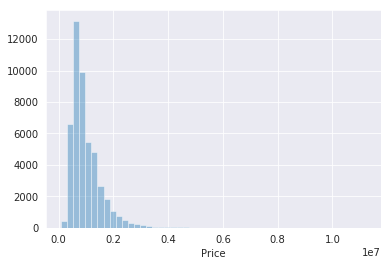

In [20]:
sns.distplot(mel_less.Price.dropna(), kde=False)

In [13]:
mel_less.Price.isna().value_counts()

False    48433
True     14590
Name: Price, dtype: int64

In [14]:
mel_full.Price.isna().value_counts()

False    27247
True      7610
Name: Price, dtype: int64

In [23]:
mel_less = mel_less.dropna(subset=['Price'])

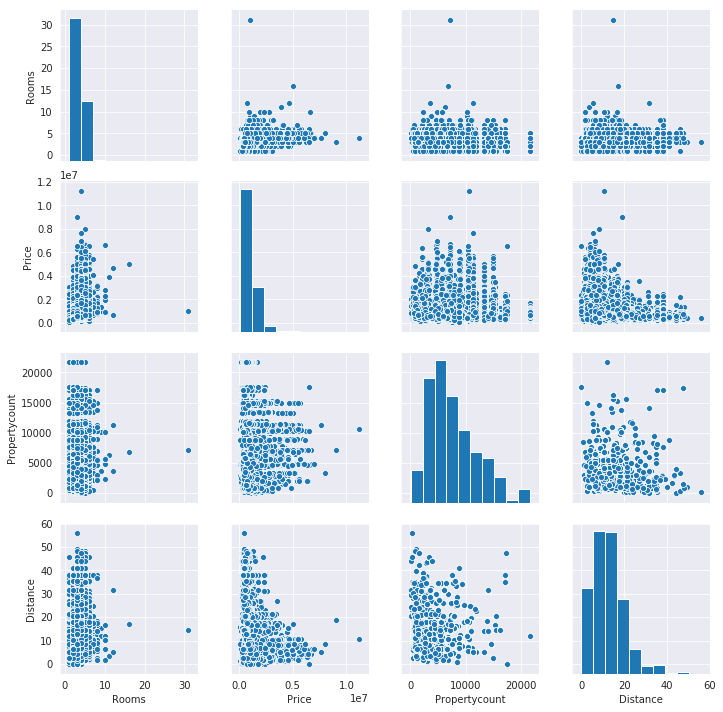

In [27]:
sns.pairplot(mel_less.drop('Postcode', axis=1))

In [65]:
mel_less.Address.str.split().str[0].str.contains(r'[/]').value_counts()

False    35159
True     13274
Name: Address, dtype: int64

In [66]:
mel_less.Address.str.split().str[0].str.contains(r'[A-Za-z]').value_counts()

False    46162
True      2271
Name: Address, dtype: int64

In [138]:
slash = mel_less[mel_less['Address_slash'] == True].index
unit = mel_less[mel_less['Address_unit'] == True].index
reg = mel_less[(mel_less['Address_slash'] != True) & (mel_less['Address_unit'] != True)].index

new = pd.DataFrame(columns=['Price', 'Addy'])
new.Price = mel_less.Price
new.loc[slash,'Addy'] = 'slash'
new.loc[unit,'Addy'] = 'unit'
new.loc[reg,'Addy'] = 'reg'

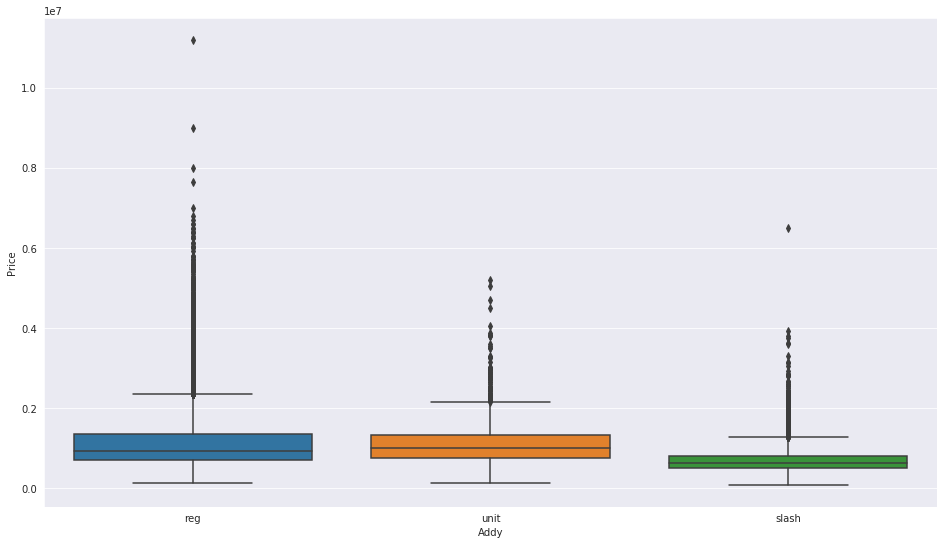

In [141]:
fig, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x='Addy', y='Price', data=new)

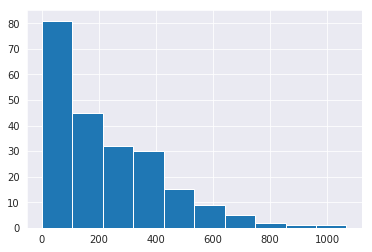

In [31]:
mel_less.Postcode.value_counts().hist()